In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
n_samples=1000
x,y=make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
len(x), len(y)

(1000, 1000)

In [ ]:
print(x[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


In [ ]:
import pandas as pd
circles=pd.DataFrame({"x0":x[:,0],"x1":x[:,1],"label":y})

In [ ]:
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


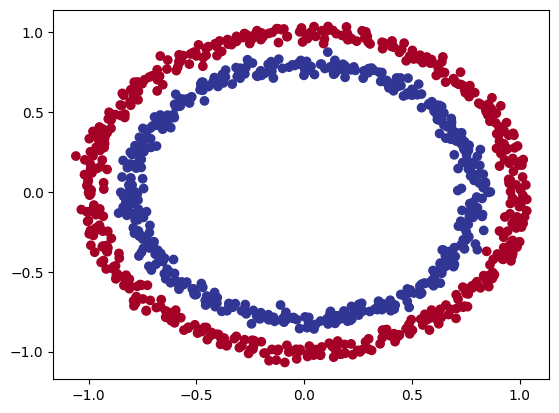

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
import torch

In [ ]:
X=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
len(X_train),len(X_test)

(800, 200)

In [ ]:
import torch
from torch import nn

all modules are sub classs fro nn.module
nn.linear data
define forward dunction
calculate loss
then backpropogation


In [ ]:
class Cricle(nn.Module):
  def __init__(self):
    super().__init__()
   # self.layer_1=nn.Linear(in_features=2,out_features=5)
  #  self.layer_2=nn.Linear(in_features=5,out_features=1)
    self.two_linear_model=nn.Sequential(nn.Linear(in_features=2,out_features=5),nn.Linear(in_features=5,out_features=1))
    #forward propogation
  def forward(self,x):
    #x=self.layer_1(x)
    #x=self.layer_2(x)
    l=self.two_linear_model(x)
    return l




In [ ]:
model1=Cricle().to("cpu")
model1

Cricle(
  (two_linear_model): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

For predicting infrencec Mode without gradient



In [ ]:
with torch.inference_mode():
  untrained=model1(X_test.to("cpu"))

In [ ]:
print(torch.round(untrained[0]),y_test[0])

tensor([-1.]) tensor(1.)


Setting up loss function

In [ ]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model1.parameters(),lr=0.1)

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

Train Model
1.  forward pass
2. calcualte loss
3. optimizer zero grad
4. back propogation
5. optimizer (grads descent )

In [ ]:
model1.eval()
with torch.inference_mode():
   y_logits=model1(X_test.to("cpu"))
y_logits[:5]


tensor([[-0.5166],
        [-0.5499],
        [-0.0960],
        [-0.6371],
        [ 0.4328]])

In [ ]:
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.3737],
        [0.3659],
        [0.4760],
        [0.3459],
        [0.6065]])

In [ ]:
y_pred_labels=torch.round(torch.sigmoid(model1(X_test.to('cpu'))))

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)



In [ ]:
epochs=100
X_train,y_train=X_train.to("cpu"),y_train.to("cpu")
X_test,y_test=X_test.to("cpu"),y_test.to("cpu")

In [ ]:
for epoch in range(epochs):
  model1.train()
  y_logits=model1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_train,y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model1.eval()
  with torch.inference_mode():
    y_logits=model1(X_test).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
    test_loss=loss_fn(y_logits,y_test)
    test_acc=accuracy_fn(y_test,y_pred)
  if epoch%10==0:
    print(f"epoch:{epoch} loss:{loss} acc:{acc} test_loss:{test_loss} test_acc:{test_acc}")



epoch:0 loss:0.7132172584533691 acc:49.125 test_loss:0.7018424868583679 test_acc:49.5
epoch:10 loss:0.7071698904037476 acc:49.5 test_loss:0.6975826025009155 test_acc:49.5
epoch:20 loss:0.7035238742828369 acc:50.24999999999999 test_loss:0.6952944397926331 test_acc:51.0
epoch:30 loss:0.7010729908943176 acc:50.125 test_loss:0.6939201354980469 test_acc:52.0
epoch:40 loss:0.6993179321289062 acc:49.75 test_loss:0.6930435299873352 test_acc:52.0
epoch:50 loss:0.6980143785476685 acc:50.24999999999999 test_loss:0.6924721598625183 test_acc:51.5
epoch:60 loss:0.6970234513282776 acc:50.375 test_loss:0.6921031475067139 test_acc:51.0
epoch:70 loss:0.6962586045265198 acc:50.375 test_loss:0.6918742656707764 test_acc:50.5
epoch:80 loss:0.695661187171936 acc:50.125 test_loss:0.6917449831962585 test_acc:51.0
epoch:90 loss:0.6951899528503418 acc:50.125 test_loss:0.6916871666908264 test_acc:51.0


In [ ]:
import requests
from pathlib import Path


if Path("helper_functions.py").is_file():
  print("already exists")
else:
  print("downloading...")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

downloading...


In [ ]:
from helper_functions import plot_decision_boundary ,plot_predictions

<function matplotlib.pyplot.show(close=None, block=None)>

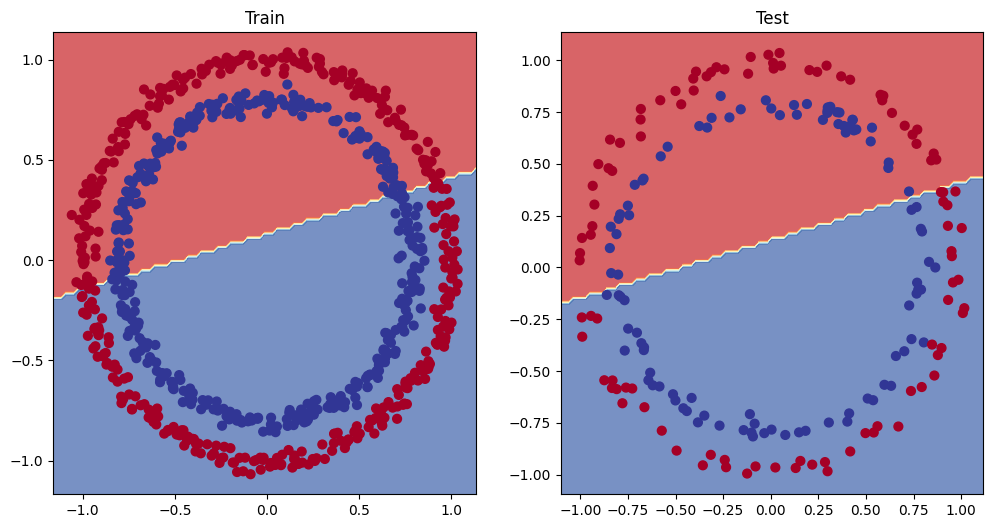

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model1,X_test,y_test)
plt.show

In [ ]:
class Cricle2(nn.Module):
  def __init__(self):
    super().__init__()
   # self.layer_1=nn.Linear(in_features=2,out_features=5)
  #  self.layer_2=nn.Linear(in_features=5,out_features=1)
    self.two_linear_model=nn.Sequential(nn.Linear(in_features=2,out_features=10),nn.Linear(in_features=10,out_features=10),nn.Linear(in_features=10,out_features=1))

    #forward propogation
  def forward(self,x):
    #x=self.layer_1(x)
    #x=self.layer_2(x)
    l=self.two_linear_model(x)
    return l


In [ ]:
model2=Cricle2().to("cpu")
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model2.parameters(),lr=0.1)

In [ ]:

epochs=1000
for epoch in range(epochs):
  model2.train()
  y_logits=model2(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_train,y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  optimizer.step()
  model2.eval()
  with torch.inference_mode():
    y_logits=model2(X_test).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
    test_loss=loss_fn(y_logits,y_test)
    test_acc=accuracy_fn(y_test,y_pred)
  if epoch%100==0:
    print(f"epoch:{epoch} loss:{loss} acc:{acc} test_loss:{test_loss} test_acc:{test_acc}")

epoch:0 loss:0.7108584046363831 acc:50.0 test_loss:0.7042446136474609 test_acc:50.0
epoch:100 loss:0.692995011806488 acc:50.875 test_loss:0.694257915019989 test_acc:46.0
epoch:200 loss:0.692980170249939 acc:51.24999999999999 test_loss:0.6946209073066711 test_acc:45.5
epoch:300 loss:0.6929798722267151 acc:51.125 test_loss:0.6946713328361511 test_acc:46.0
epoch:400 loss:0.6929798126220703 acc:51.125 test_loss:0.6946783661842346 test_acc:46.0
epoch:500 loss:0.6929798126220703 acc:51.0 test_loss:0.6946794390678406 test_acc:46.0
epoch:600 loss:0.6929798126220703 acc:51.0 test_loss:0.6946794390678406 test_acc:46.0
epoch:700 loss:0.6929798126220703 acc:51.0 test_loss:0.6946795582771301 test_acc:46.0
epoch:800 loss:0.6929798126220703 acc:51.0 test_loss:0.6946795582771301 test_acc:46.0
epoch:900 loss:0.6929798126220703 acc:51.0 test_loss:0.6946795582771301 test_acc:46.0


<function matplotlib.pyplot.show(close=None, block=None)>

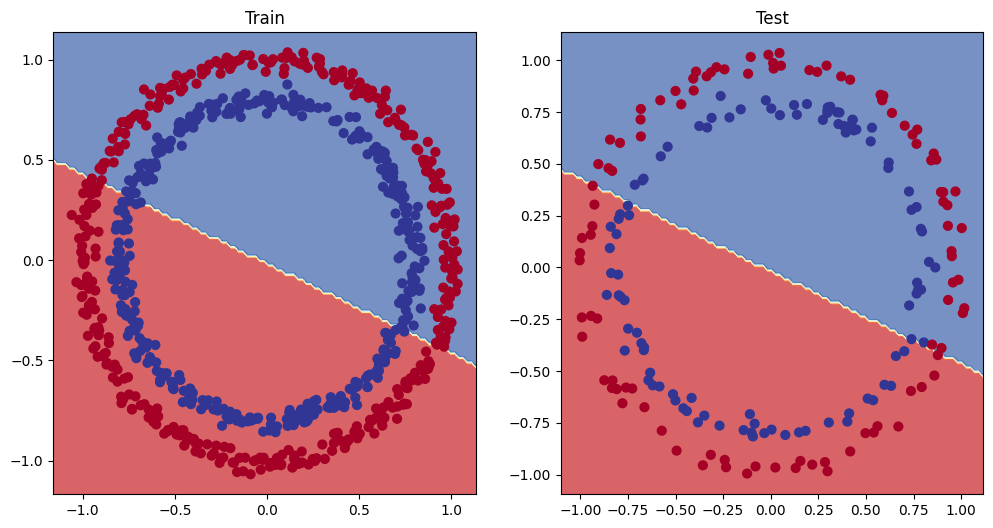

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model2,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model2,X_test,y_test)
plt.show

In [ ]:
class Cricle3(nn.Module):
  def __init__(self):
    super().__init__()
   # self.layer_1=nn.Linear(in_features=2,out_features=5)
  #  self.layer_2=nn.Linear(in_features=5,out_features=1)
    self.two_linear_model=nn.Sequential(nn.Linear(in_features=2,out_features=10),nn.ReLU(),nn.Linear(in_features=10,out_features=10),nn.ReLU(),nn.Linear(in_features=10,out_features=1))

    #forward propogation
  def forward(self,x):
    #x=self.layer_1(x)
    #x=self.layer_2(x)
    l=self.two_linear_model(x)
    return l

In [ ]:
epoches=1000
model3=Cricle3().to("cpu")
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model3.parameters(),lr=0.1)
for epoch in range(epoches):
  model3.train()
  y_logits=model3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_train,y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model3.eval()
  with torch.inference_mode():
    y_logits=model3(X_test).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
    test_loss=loss_fn(y_logits,y_test)
    test_acc=accuracy_fn(y_test,y_pred)
  print(f"epoch:{epoch} loss:{loss} acc:{acc} test_loss:{test_loss} test_acc:{test_acc}")


epoch:0 loss:0.6960347890853882 acc:50.0 test_loss:0.6954813599586487 test_acc:50.0
epoch:1 loss:0.695770800113678 acc:50.0 test_loss:0.6952301263809204 test_acc:50.0
epoch:2 loss:0.695522129535675 acc:50.0 test_loss:0.6949922442436218 test_acc:50.0
epoch:3 loss:0.695285975933075 acc:50.0 test_loss:0.6947673559188843 test_acc:50.0
epoch:4 loss:0.6950618624687195 acc:50.0 test_loss:0.6945545077323914 test_acc:50.0
epoch:5 loss:0.6948497891426086 acc:50.0 test_loss:0.6943538188934326 test_acc:50.0
epoch:6 loss:0.6946489214897156 acc:50.0 test_loss:0.6941642761230469 test_acc:50.0
epoch:7 loss:0.6944580078125 acc:50.0 test_loss:0.6939857602119446 test_acc:50.0
epoch:8 loss:0.6942752003669739 acc:50.0 test_loss:0.6938150525093079 test_acc:50.0
epoch:9 loss:0.6940991282463074 acc:50.0 test_loss:0.6936535835266113 test_acc:50.0
epoch:10 loss:0.6939308643341064 acc:50.0 test_loss:0.6934995055198669 test_acc:50.0
epoch:11 loss:0.693769097328186 acc:50.0 test_loss:0.6933528780937195 test_acc:50

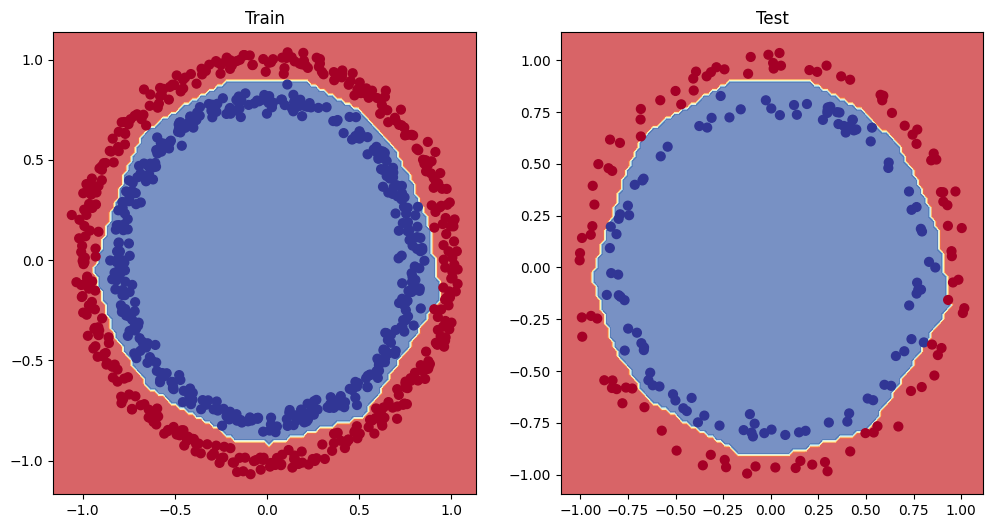

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model3,X_test,y_test)
plt.show()

In [ ]:
model3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model3(X_test))).squeeze()
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

Multi class Problem

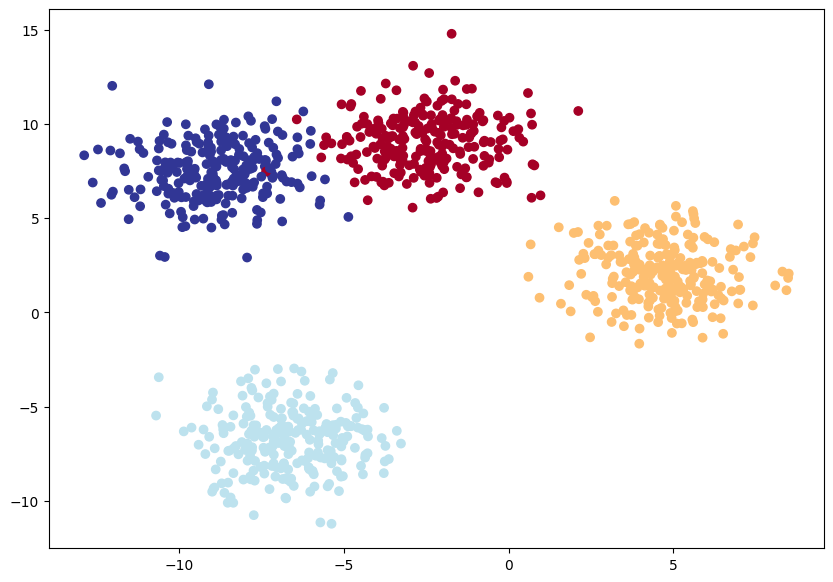

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


num_class=4
nums_feature=2
random_seed=42

#create amulticlass data

x_blob,y_blob=make_blobs(n_samples=1000,n_features=nums_feature,centers=num_class,random_state=random_seed, cluster_std=1.5)
x_blob=torch.from_numpy(x_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

x_blob_train,x_blob_test,y_blob_train,y_blob_test=train_test_split(x_blob,y_blob,test_size=0.2,random_state=random_seed)


#plot data after creation
plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],x_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
device="cpu"
import torch
from torch import nn

In [ ]:
class BlopModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    # Pass the input data through the linear layer stack
    return self.linear_layer_stack(x)

In [ ]:
m_model(x_blob_train[:5])

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2391, -0.2472,  0.1494,  0.0213],
        [-0.1214, -0.9804, -0.6918, -0.1923]], grad_fn=<AddmmBackward0>)

In [ ]:
x_blob_train.shape,y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
m_model=BlopModel(input_features=2,output_features=4,hidden_units=8).to(device)

In [ ]:
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=m_model.parameters(),lr=0.1)

In [ ]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=100
x_blob_train,y_blob_train=x_blob_train.to(device),y_blob_train.to(device)
x_blob_test,y_blob_test=x_blob_test.to(device),y_blob_test.to(device)

for epoch in range(epochs):
  m_model.train()
  y_logits=m_model(x_blob_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
  loss_fn=loss(y_logits,y_blob_train)
  acc=accuracy_fn(y_blob_train,y_pred)
  optimizer.zero_grad()
  loss_fn.backward()
  optimizer.step()

  m_model.eval()
  with torch.inference_mode():
    test_logits=m_model(x_blob_test)
    test_pred=torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss=loss(test_logits,y_blob_test)
    test_acc=accuracy_fn(y_blob_test,test_pred)
  if epoch%10==0:
    print(f"epoch:{epoch} loss:{loss} acc:{acc} test_loss:{test_loss} test_acc:{test_acc}")

epoch:0 loss:CrossEntropyLoss() acc:70.625 test_loss:1.0249963998794556 test_acc:78.0
epoch:10 loss:CrossEntropyLoss() acc:72.875 test_loss:0.5384136438369751 test_acc:79.5
epoch:20 loss:CrossEntropyLoss() acc:73.125 test_loss:0.4069463610649109 test_acc:79.0
epoch:30 loss:CrossEntropyLoss() acc:81.125 test_loss:0.33101481199264526 test_acc:84.5
epoch:40 loss:CrossEntropyLoss() acc:88.25 test_loss:0.27306994795799255 test_acc:90.0
epoch:50 loss:CrossEntropyLoss() acc:95.375 test_loss:0.2047707587480545 test_acc:98.0
epoch:60 loss:CrossEntropyLoss() acc:98.5 test_loss:0.12287280708551407 test_acc:99.0
epoch:70 loss:CrossEntropyLoss() acc:98.875 test_loss:0.07413792610168457 test_acc:99.0
epoch:80 loss:CrossEntropyLoss() acc:98.875 test_loss:0.053242992609739304 test_acc:99.0
epoch:90 loss:CrossEntropyLoss() acc:98.875 test_loss:0.04324769973754883 test_acc:99.0


In [ ]:
import requests
from pathlib import Path


if Path("helper_functions.py").is_file():
  print("already exists")
else:
  print("downloading...")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

downloading...


In [ ]:
from helper_functions import plot_decision_boundary ,plot_predictions

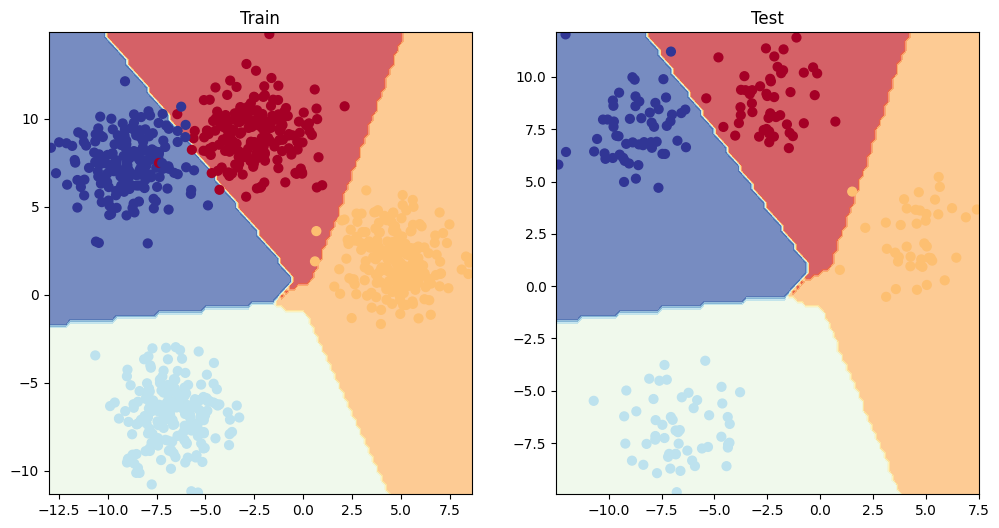

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(m_model,x_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(m_model,x_blob_test,y_blob_test)
plt.show()

In [ ]:
from torchmetrics import Accuracy
torch_acc=Accuracy(task="multiclass",num_classes=4).to(device)
torch_acc(y_blob_test,test_pred)

ModuleNotFoundError: No module named 'torchmetrics'